# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    #f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | den burg
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | la ronge
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | qapqal
City not found. Skipping...
Processing Record 9 of Set 1 | srivardhan
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | santana
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | malpica
Processing Record 14 of Set 1 | clarksdale
Processing Record 15 of Set 1 | the bottom
Processing Record 16 of Set 1 | viqueque
Processing Record 17 of Set 1 | colchani
Processing Record 18 of Set 1 | darnah
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | beboto
Processing Record 22 of

Processing Record 41 of Set 4 | tura
Processing Record 42 of Set 4 | oodweyne
Processing Record 43 of Set 4 | vershino-darasunskiy
Processing Record 44 of Set 4 | catriel
Processing Record 45 of Set 4 | polyarnyy
Processing Record 46 of Set 4 | bushland beach
City not found. Skipping...
Processing Record 47 of Set 4 | port arthur
Processing Record 48 of Set 4 | howard springs
Processing Record 49 of Set 4 | udachny
Processing Record 0 of Set 5 | kodinsk
Processing Record 1 of Set 5 | hammerfest
Processing Record 2 of Set 5 | yung shue wan
Processing Record 3 of Set 5 | oamaru
Processing Record 4 of Set 5 | mabaruma
Processing Record 5 of Set 5 | bani mazar
Processing Record 6 of Set 5 | vilyuchinsk
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | luderitz
Processing Record 9 of Set 5 | niquelandia
Processing Record 10 of Set 5 | mazar-e sharif
Processing Record 11 of Set 5 | emerald
Processing Record 12 of Set 5 | okhotsk
Processing Record 13 of Set 5 | mhamid
Proces

Processing Record 32 of Set 8 | acapetahua
Processing Record 33 of Set 8 | cadale
Processing Record 34 of Set 8 | plouzane
Processing Record 35 of Set 8 | laayoune plage
City not found. Skipping...
Processing Record 36 of Set 8 | mhasvad
Processing Record 37 of Set 8 | huangnihe
Processing Record 38 of Set 8 | antalaha
Processing Record 39 of Set 8 | semey
Processing Record 40 of Set 8 | nurota
Processing Record 41 of Set 8 | port-vila
Processing Record 42 of Set 8 | raton
Processing Record 43 of Set 8 | keflavik
Processing Record 44 of Set 8 | stephenville
Processing Record 45 of Set 8 | saint-pierre
Processing Record 46 of Set 8 | mossel bay
Processing Record 47 of Set 8 | mollendo
Processing Record 48 of Set 8 | villas de irapuato
City not found. Skipping...
Processing Record 49 of Set 8 | cabedelo
Processing Record 0 of Set 9 | shevchenko
Processing Record 1 of Set 9 | accra
Processing Record 2 of Set 9 | ixtapa
Processing Record 3 of Set 9 | kuybyshev
Processing Record 4 of Set 9 

Processing Record 18 of Set 12 | balqash
Processing Record 19 of Set 12 | black point
Processing Record 20 of Set 12 | laghouat
Processing Record 21 of Set 12 | kutum
Processing Record 22 of Set 12 | vastaboland
City not found. Skipping...
Processing Record 23 of Set 12 | faya-largeau
Processing Record 24 of Set 12 | inebolu
Processing Record 25 of Set 12 | sao raimundo nonato
Processing Record 26 of Set 12 | odemira
Processing Record 27 of Set 12 | douentza
Processing Record 28 of Set 12 | prince rupert
Processing Record 29 of Set 12 | am djarass
City not found. Skipping...
Processing Record 30 of Set 12 | makhambet
Processing Record 31 of Set 12 | srandakan
Processing Record 32 of Set 12 | naliya
Processing Record 33 of Set 12 | cafayate
Processing Record 34 of Set 12 | fairless hills
Processing Record 35 of Set 12 | new norfolk
Processing Record 36 of Set 12 | charters towers
Processing Record 37 of Set 12 | blythe
Processing Record 38 of Set 12 | idaho falls
Processing Record 39 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,den burg,53.0542,4.7972,17.20,97,100,10.80,NL,1690102877
1,port-aux-francais,-49.3500,70.2167,5.73,86,99,16.40,TF,1690102518
2,adamstown,-25.0660,-130.1015,21.25,67,0,8.66,PN,1690102515
3,blackmans bay,-43.0167,147.3167,9.74,81,70,2.69,AU,1690102515
4,la ronge,55.1001,-105.2842,11.14,93,0,0.00,CA,1690102547


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,den burg,53.0542,4.7972,17.20,97,100,10.80,NL,1690102877
1,port-aux-francais,-49.3500,70.2167,5.73,86,99,16.40,TF,1690102518
2,adamstown,-25.0660,-130.1015,21.25,67,0,8.66,PN,1690102515
3,blackmans bay,-43.0167,147.3167,9.74,81,70,2.69,AU,1690102515
4,la ronge,55.1001,-105.2842,11.14,93,0,0.00,CA,1690102547


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

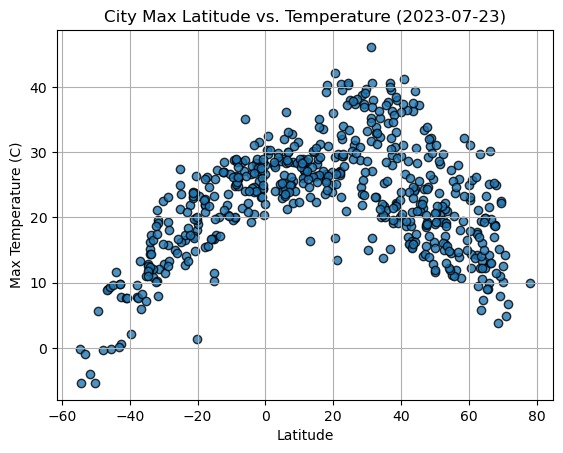

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", alpha=0.8, edgecolor="black")

#import datetime module
import datetime
today = datetime.date.today()

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (" + str(today) + ")")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

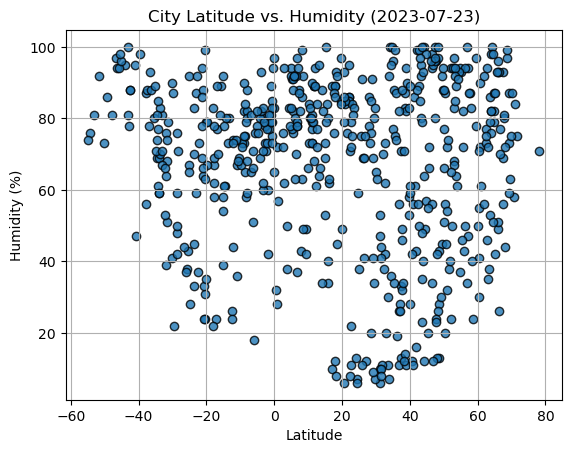

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", alpha=0.8, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + str(today) + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

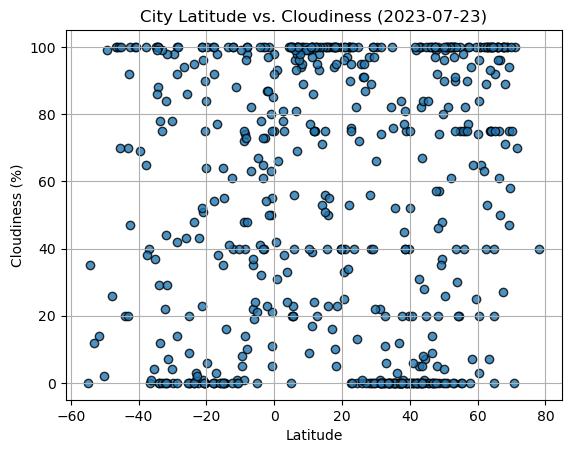

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", alpha=0.8, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + str(today) + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

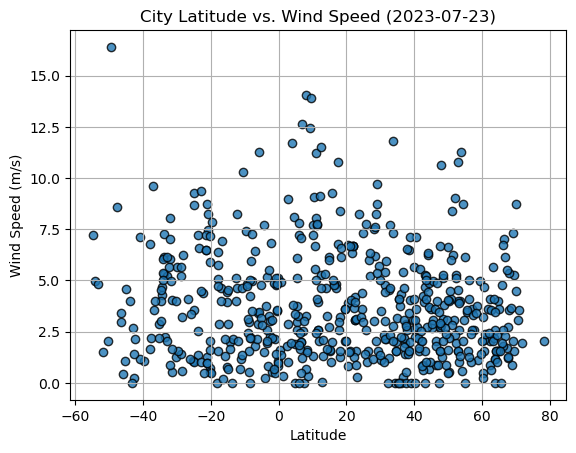

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", alpha=0.8, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + str(today) + ")")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_func(x,y,x_coord,y_coord):
    plt.scatter(x, y, marker="o", alpha=0.8)
    slope, intercept, r, p, se = linregress(x, y)
    # y = mx + b equation
    y_values = slope * x + intercept
    eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.plot(x, y_values, color="red")

    print(f"The r-value is: {r**2}")

    plt.annotate(eq,
                 xy = (x_coord,y_coord),
                 color = "red",
                 fontsize = 13,
                 fontweight = "normal"
                 )

    # Incorporate the other graph properties
    plt.ylabel(y.name)
    plt.xlabel("Latitude")

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,den burg,53.0542,4.7972,17.20,97,100,10.80,NL,1690102877
4,la ronge,55.1001,-105.2842,11.14,93,0,0.00,CA,1690102547
7,srivardhan,18.0333,73.0167,26.58,89,100,8.40,IN,1690102882
10,bethel,41.3712,-73.4140,18.75,86,0,1.54,US,1690102513
11,malpica,43.3228,-8.8105,20.76,80,100,4.68,ES,1690102884


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,5.73,86,99,16.40,TF,1690102518
2,adamstown,-25.0660,-130.1015,21.25,67,0,8.66,PN,1690102515
3,blackmans bay,-43.0167,147.3167,9.74,81,70,2.69,AU,1690102515
5,edinburgh of the seven seas,-37.0676,-12.3116,13.37,78,40,9.63,SH,1690102512
6,grytviken,-54.2811,-36.5092,-5.36,76,35,4.99,GS,1690102512


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.27922688041309107


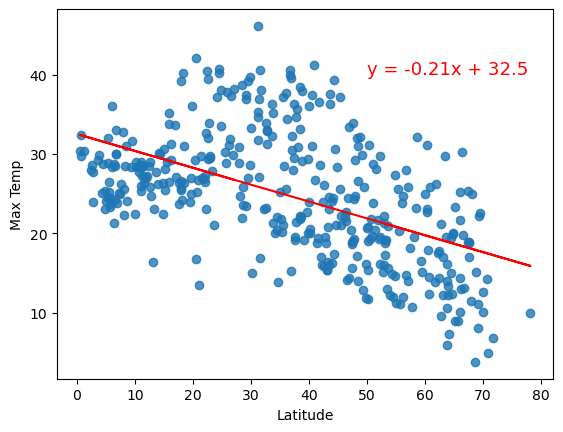

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_func(x,y,50,40)

The r-value is: 0.7238889158899003


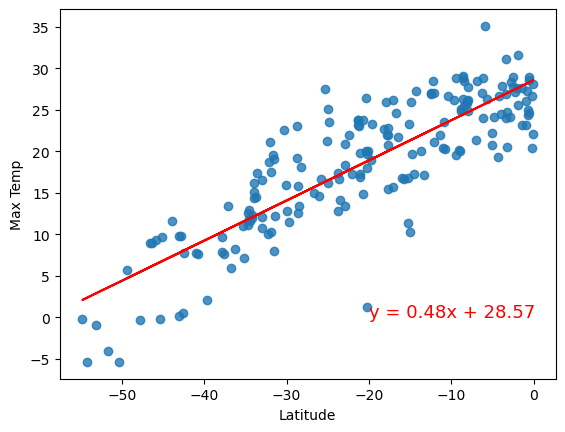

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_func(x,y,-20,0)

**Discussion about the linear relationship:** 
There is a medium-strength negative correlation between latitude and maximum temperature on the Northern Hemisphere. This means that typically the farther north from the equator a city is positioned, the lower its maximum temperature will be. 
There is a  medium-strength positive correlation between latitude and maximum temperature on the Southern Hemisphere. This means that typically the closer to the equator a city is positioned, the higher its maximum temperature will be. 

There is more variance in the maximum temperature on the Northern Hemisphere than the Southern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 4.558006273890707e-05


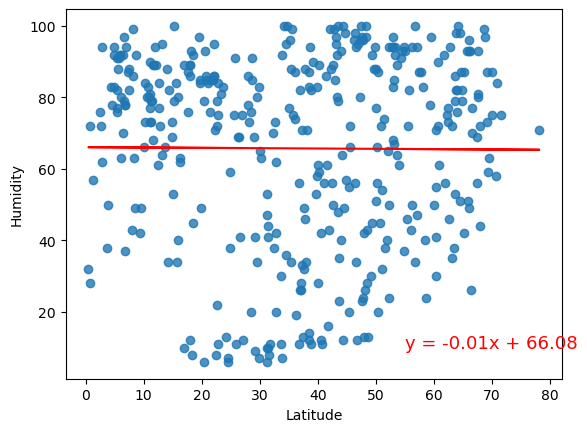

In [17]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_func(x,y,55,10)

The r-value is: 0.0104736695265375


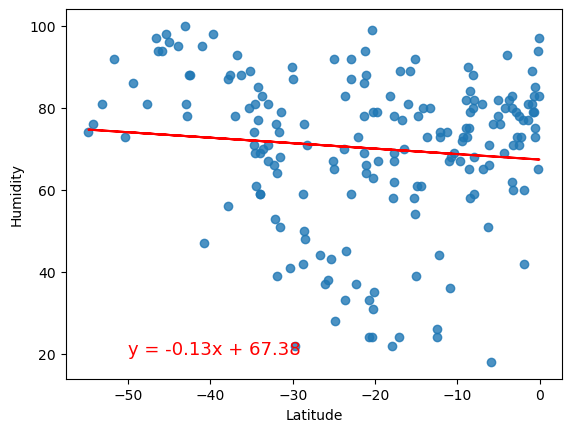

In [18]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_func(x,y,-50,20)

**Discussion about the linear relationship:** 
There is almost no correlation or relationship between a city's position from the equator and its humidity level. The relationship is weaker for cities in the Northern Hemisphere than in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0010006044876450229


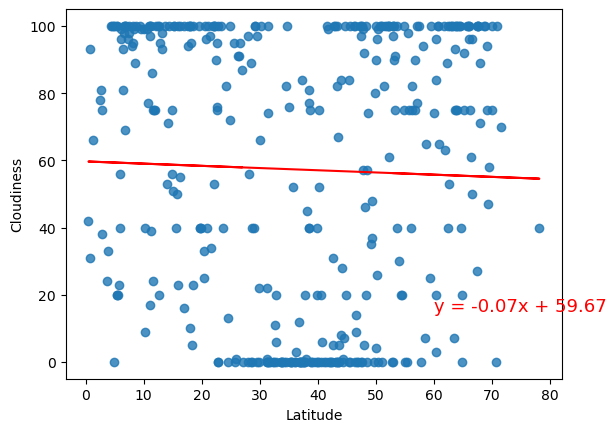

In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_func(x,y,60,15)

The r-value is: 0.0011931910528824212


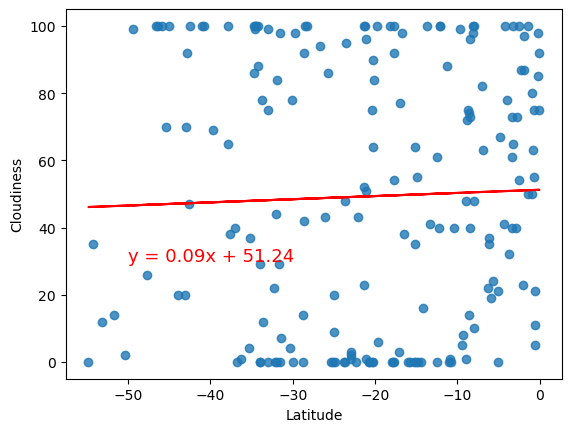

In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_func(x,y,-50,30)

**Discussion about the linear relationship:** 
There is no correlation or relationship between a city's position from the equator and its cloudiness level. The levels of cloudiness is more dispersed across all latitudes in the Northen Hemisphere than the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03443429733535439


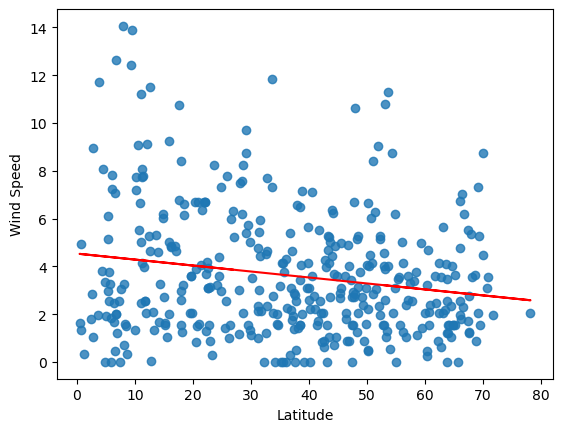

In [21]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_func(x,y,10,15)

The r-value is: 0.015938493308030495


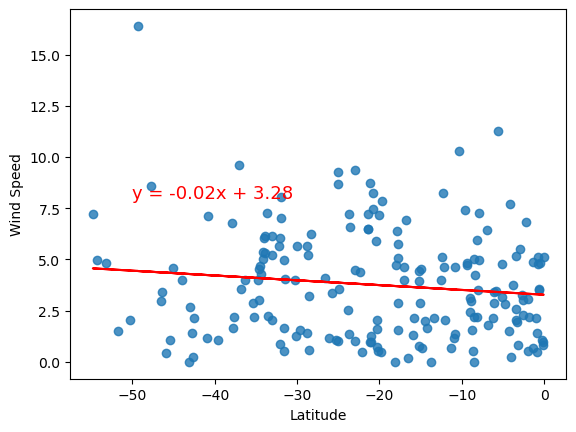

In [22]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_func(x,y,-50,8)

**Discussion about the linear relationship:** 
There is almost no correlation between a city's position from the equator and its wind speed. For most of the latitudes in the Northern and Southern Hemisphere, the wind speed is between 0 m/s to 10 m/s.